# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

So far we have studied about various mophological operations and different thresholding techniques in some detail. Now it's time to apply these concepts for a practical application - **Coin Detection**.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this assignment, you will work with 2 different images (so 2 different parts) and will use **only** morphological operations and thresholding techniques to detect the total number of coins present in the image. Your submission will be graded based on your use of the concepts covered in this module, experimentation performed to achieve at your final solution, documentation, and finally, the total number of coins successfully detected in the images. Each part will be of 15 marks. This assignment will be entirely **manually graded** so make sure that you do NOT remove any experimentation you have done as well as the observation you made after each step.

**Proper documentation for each step should be provided with help of markdown**

## <font style = "color:rgb(50,120,229)">Outline</font>

The main steps that you can follow to solve this assignment are:

1. Read the image.
2. Convert it to grayscale and split the image into the 3 (Red, Green and Blue) channels. Decide which of the above 4 images you want to use in further steps and provide reason for the same.
3. Use thresholding and/or morphological operations to arrive at a final binary image.
4. Use **simple blob detector** to count the number of coins present in the image.
5. Use **contour detection** to count the number of coins present in the image.
6. Use **CCA** to count the number of coins present in the image.

**We have also provided the results we obtained at the intermediate steps for your reference.**

# <font style = "color:rgb(50,120,229)">Assignment Part - A</font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [1]:
import cv2
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
import numpy as np
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Text(0.5, 1.0, 'Original Image')

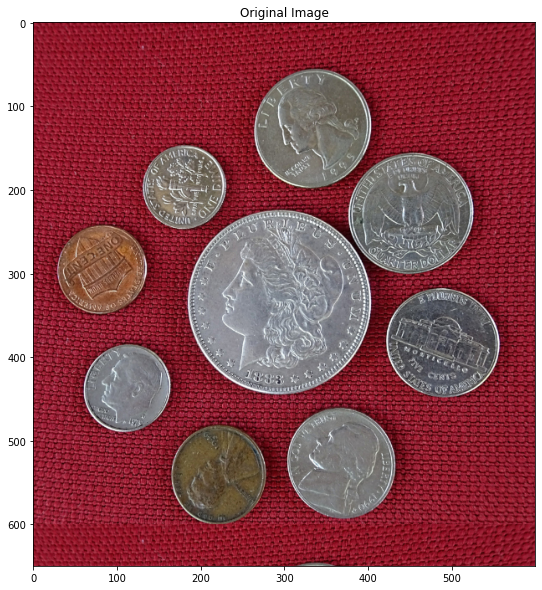

In [3]:
# Image path
imagePath = DATA_PATH + "images/CoinsA.png"
# Read image
# Store it in the variable image
###
### YOUR CODE HERE
###
image = cv2.imread(imagePath)
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [4]:
# Convert image to grayscale
# Store it in the variable imageGray
###
### YOUR CODE HERE
###
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

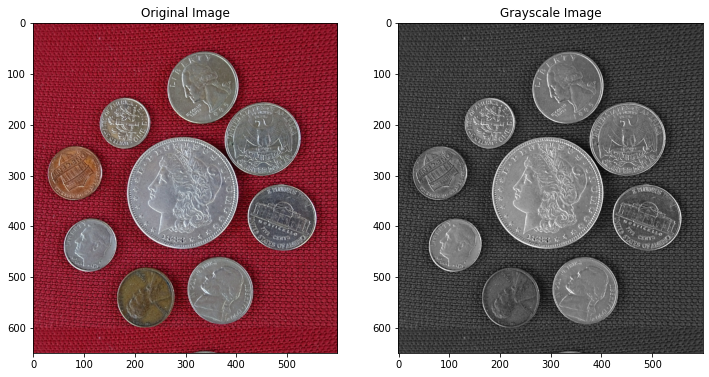

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [6]:
# Split cell into channels
# Store them in variables imageB, imageG, imageR
###
### YOUR CODE HERE
###
imageB = image[:, :, 0]
imageG = image[:, :, 1]
imageR = image[:, :, 2]

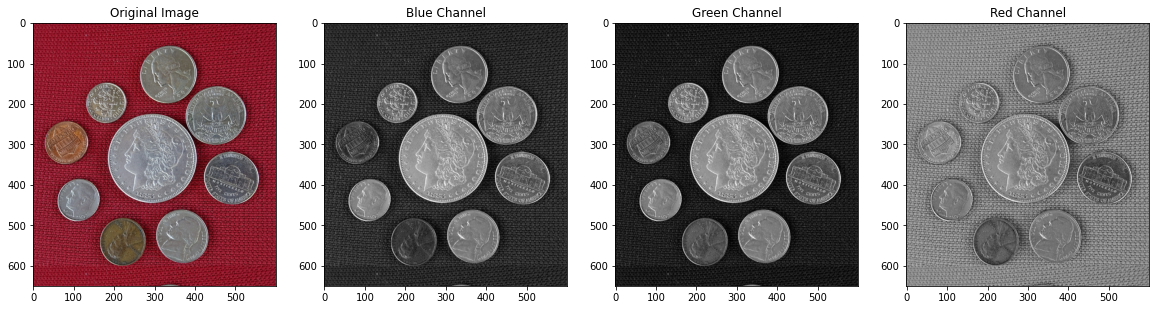

In [7]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [8]:
###
### YOUR CODE HERE
###
def thresholdingTrials(src, thresh, maxValue):
    # Binary Thresholding 
    th, dst_bin = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY)
    # Inverse Binary Thresholding 
    th, dst_bin_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY_INV)
    # Truncate Thresholding 
    th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)
    # Threshold to Zero 
    th, dst_to_zero = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO)
    # Inverted Threshold to Zero
    th, dst_to_zero_inv = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TOZERO_INV)
    print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
    plt.figure(figsize=[20,12])
#     plt.subplot(231);plt.imshow(src, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
#     plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
#     plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
#     plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
#     plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
#     plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");
    plt.subplot(231);plt.imshow(src);plt.title("Original Image");
    plt.subplot(232);plt.imshow(dst_bin);plt.title("Threshold Binary");
    plt.subplot(233);plt.imshow(dst_bin_inv);plt.title("Threshold Binary Inverse");
    plt.subplot(234);plt.imshow(dst_trunc);plt.title("Threshold Truncate");
    plt.subplot(235);plt.imshow(dst_to_zero);plt.title("Threshold To Zero");
    plt.subplot(236);plt.imshow(dst_to_zero_inv);plt.title("Threshold To Zero Inverse");

Threshold Value = 100, Max Value = 150


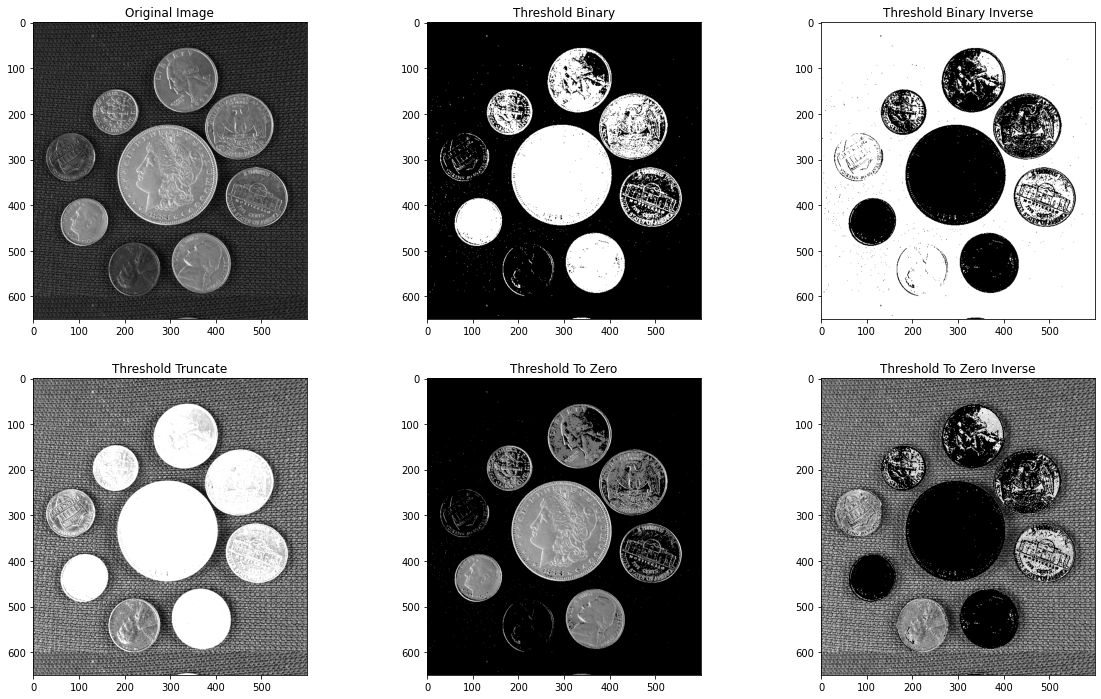

In [9]:
thresh = 100
maxValue = 150
thresholdingTrials(imageB, thresh, maxValue)

Threshold Value = 100, Max Value = 150


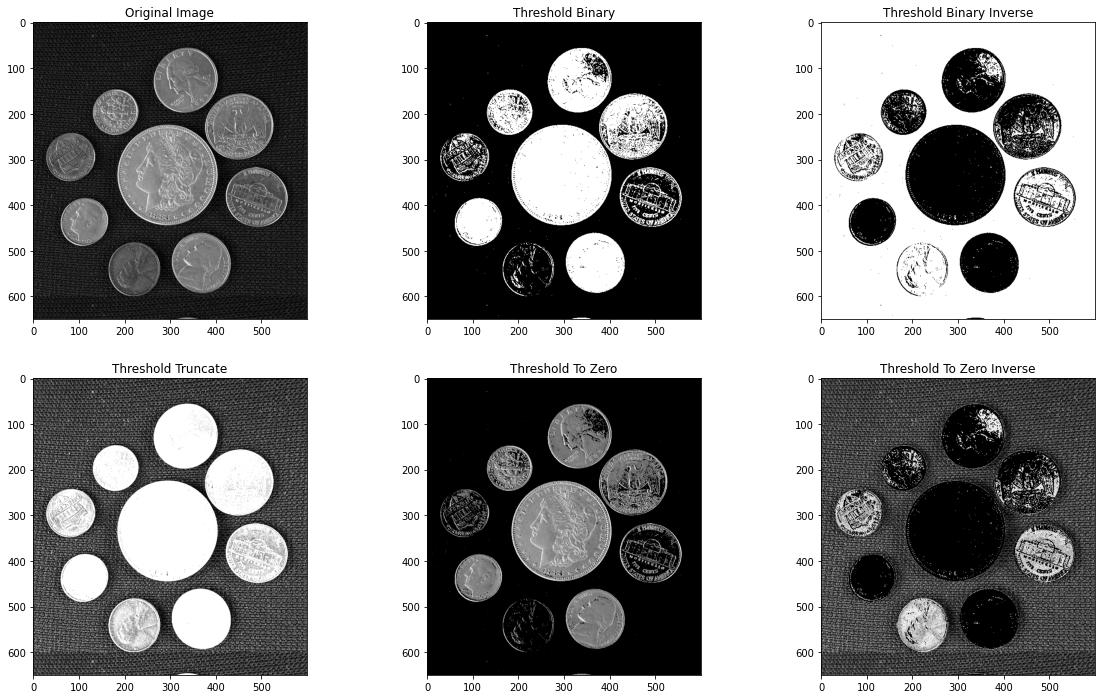

In [10]:
thresholdingTrials(imageG, thresh, maxValue)

Threshold Value = 100, Max Value = 150


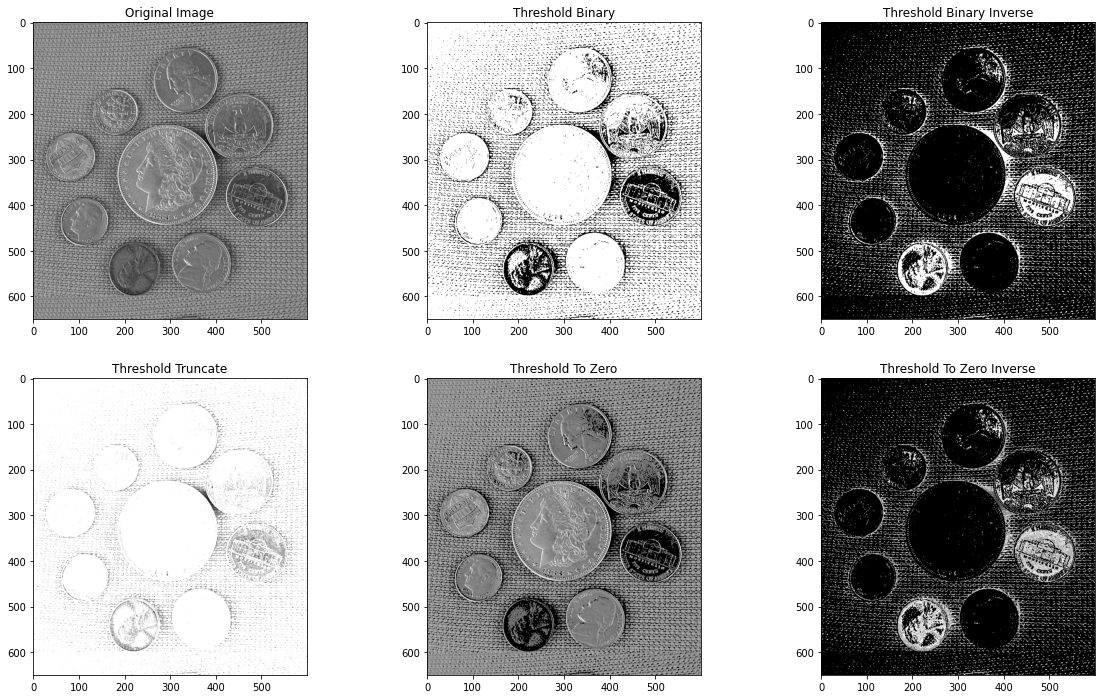

In [11]:
thresholdingTrials(imageR, thresh, maxValue)

Threshold Value = 100, Max Value = 150


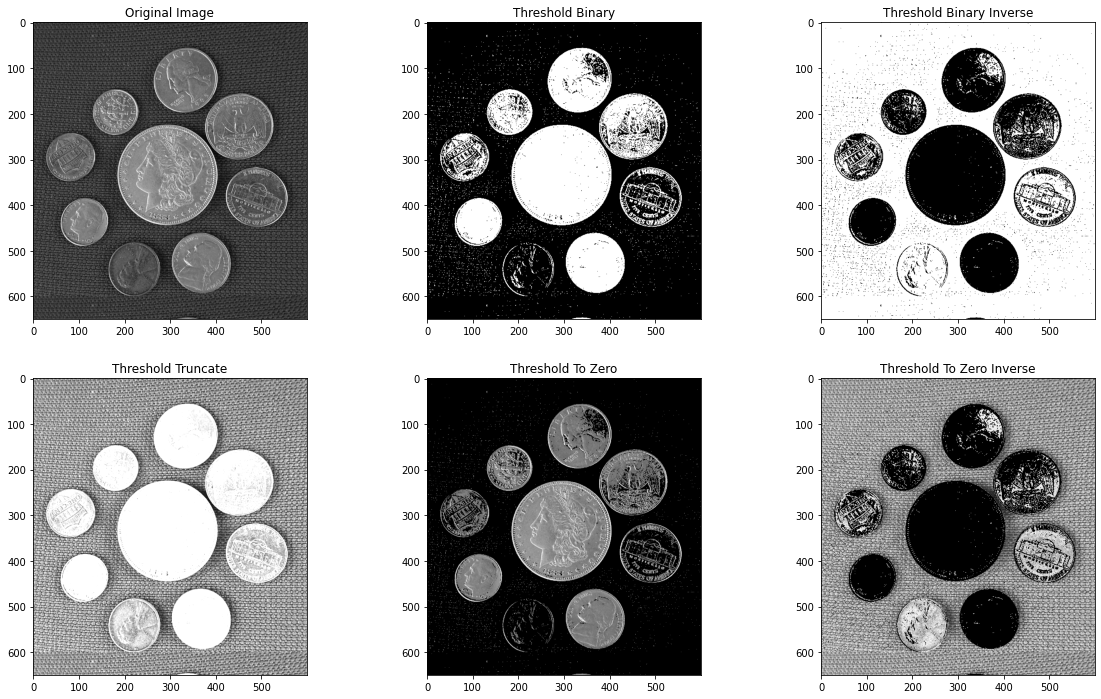

In [12]:
thresholdingTrials(imageGray, thresh, maxValue)

In [31]:
def thresholdingActual(src, thresh, maxValue):
    # thresholding truncate
    th, dst_trunc = cv2.threshold(src, thresh, maxValue, cv2.THRESH_TRUNC)

    # threshold binary inverse
    th, dst_bin_inv = cv2.threshold(dst_trunc, 40, 100, cv2.THRESH_BINARY_INV)
    
    plt.figure(figsize=[20,12])
    plt.subplot(131);plt.imshow(src);plt.title("Original Image");
    plt.subplot(132);plt.imshow(dst_trunc);plt.title("Threshold Truncate");
    plt.subplot(133);plt.imshow(dst_bin_inv);plt.title("Threshold Binary Inverse");
    
    return dst_bin_inv

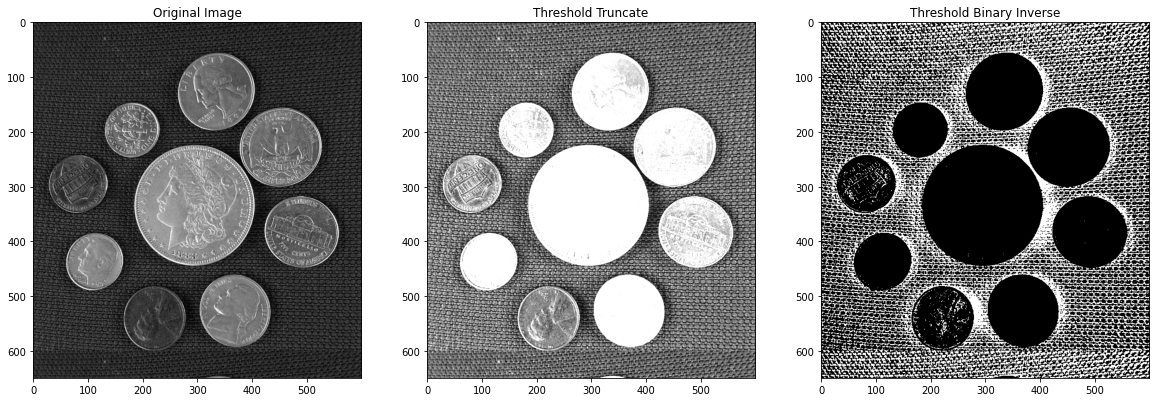

In [33]:
thresholdingActual(imageB, thresh, maxValue);

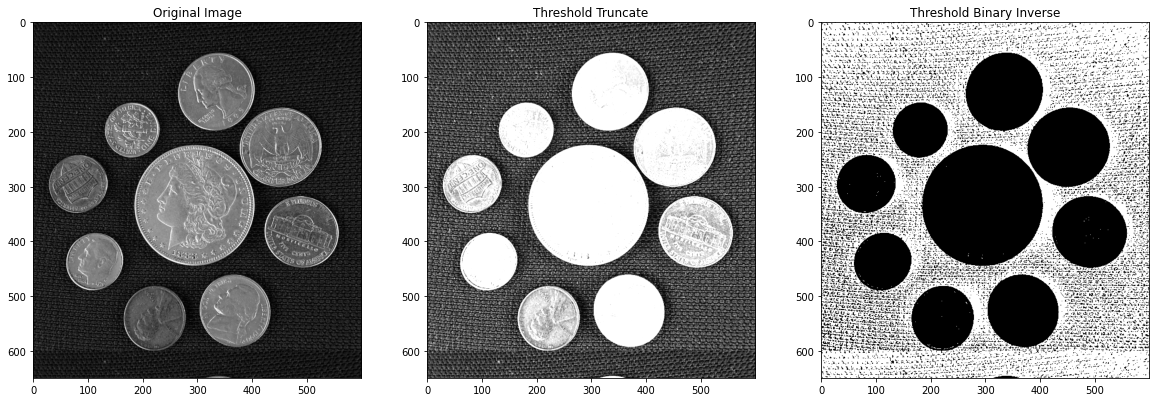

In [34]:
thresholdingActual(imageG, thresh, maxValue);

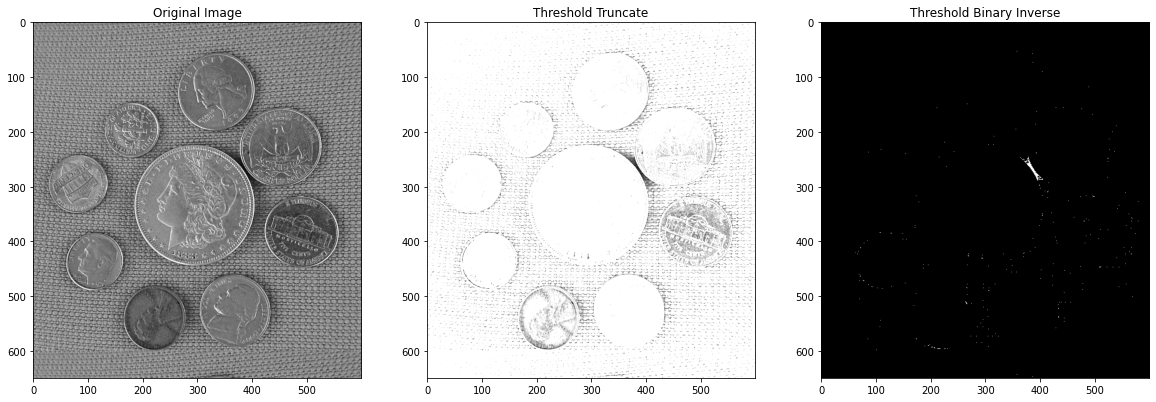

In [35]:
thresholdingActual(imageR, thresh, maxValue);

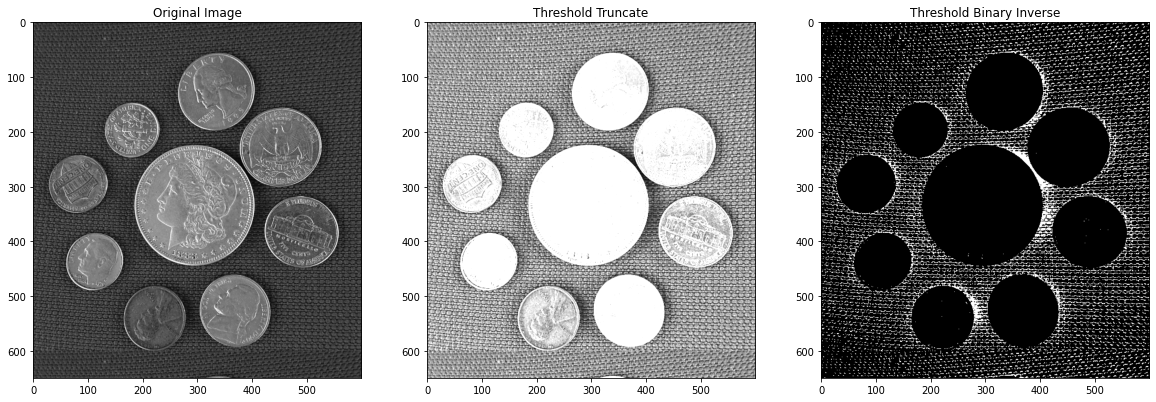

In [36]:
thresholdingActual(imageGray, thresh, maxValue);

### Observation
After observing the above images and the image shown in the video I infered that the first step should be to apply cv2.THRESH_TRUNC and then later cv2.THRESH_BINARY_INV on the output image of the previous step. I have created function `thresholdingActual(src, thresh, maxValue)` for the same.

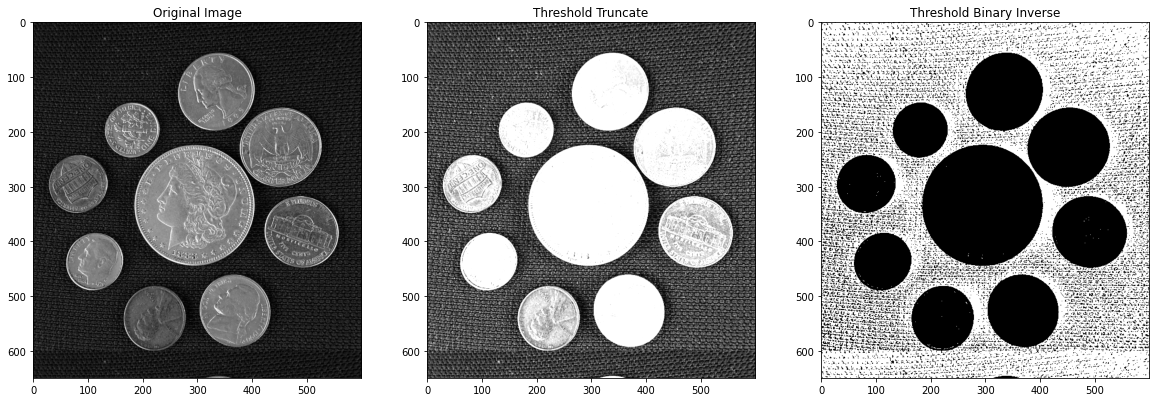

In [41]:
imageThresholded = thresholdingActual(imageG, thresh, maxValue);

Text(0.5, 1.0, 'Thresholded Image')

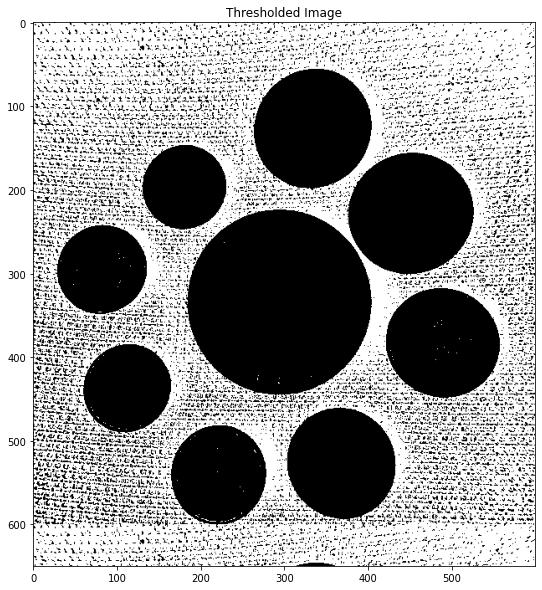

In [42]:
# Display the thresholded image
###
### YOUR CODE HERE
###
plt.imshow(imageThresholded); plt.title("Thresholded Image")

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
# Display all the images
# you have obtained in the intermediate steps
###
### YOUR CODE HERE
###


In [ ]:
# Get structuring element/kernel which will be used for dilation
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [18]:
keep this line in the cell below which you are coding

SyntaxError: invalid syntax (<ipython-input-18-fe207845d482>, line 1)

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [ ]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [ ]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [ ]:
# Detect blobs
###
### YOUR CODE HERE
###


In [ ]:
# Print number of coins detected
###
### YOUR CODE HERE
###


**Note that we were able to detect all 9 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [ ]:
# Mark coins using image annotation concepts we have studied so far
###
### YOUR CODE HERE
###


In [ ]:
# Display the final image
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [ ]:
def displayConnectedComponents(im):
    imLabels = im
    # The following line finds the min and max pixel values
    # and their locations in an image.
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(imLabels)
    # Normalize the image so the min value is 0 and max value is 255.
    imLabels = 255 * (imLabels - minVal)/(maxVal-minVal)
    # Convert image to 8-bits unsigned type
    imLabels = np.uint8(imLabels)
    # Apply a color map
    imColorMap = cv2.applyColorMap(imLabels, cv2.COLORMAP_JET)
    # Display colormapped labels
    plt.imshow(imColorMap[:,:,::-1])

In [ ]:
# Find connected components
###
### YOUR CODE HERE
###


In [ ]:
# Print number of connected components detected
###
### YOUR CODE HERE
###


In [ ]:
# Display connected components using displayConnectedComponents
# function
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [ ]:
# Find all contours in the image
###
### YOUR CODE HERE
###


In [ ]:
# Print the number of contours found
###
### YOUR CODE HERE
###


In [ ]:
# Draw all contours
###
### YOUR CODE HERE
###


Let's only consider the outer contours.

In [ ]:
# Remove the inner contours
# Display the result
###
### YOUR CODE HERE
###


So, we only need the inner contours. The easiest way to do that will be to remove the outer contour using area.

In [ ]:
# Print area and perimeter of all contours
###
### YOUR CODE HERE
###


In [ ]:
# Print maximum area of contour
# This will be the box that we want to remove
###
### YOUR CODE HERE
###


In [ ]:
# Remove this contour and plot others
###
### YOUR CODE HERE
###


In [ ]:
# Fit circles on coins
###
### YOUR CODE HERE
###


# <font style = "color:rgb(50,120,229)">Assignment Part - B</font>

**Follow the same steps as provided in Assignment Part - A**

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [ ]:
# Image path
imagePath = DATA_PATH + "images/CoinsB.png"
# Read image
# Store it in variable image
###
### YOUR CODE HERE
###
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [ ]:
# Convert to grayscale
# Store in variable imageGray
###
### YOUR CODE HERE
###


In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [ ]:
# Split cell into channels
# Variables are: imageB, imageG, imageR
###
### YOUR CODE HERE
###


In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
# Display image using matplotlib
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [ ]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [ ]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)


## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [ ]:
# Detect blobs
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


**Note that we were able to detect 8 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

Now, let's perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### YOUR CODE HERE
###


## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [ ]:
# Find all contours in the image
###
### YOUR CODE HERE
###


In [ ]:
# Print the number of contours found
###
### YOUR CODE HERE
###


In [ ]:
# Draw all contours
###
### YOUR CODE HERE
###


In [ ]:
# Remove the inner contours
# Display the result
###
### YOUR CODE HERE
###


What do you think went wrong? As we can see, the outer box was detected as a contour and with respect to it, all other contours are internal and that's why they were not detected. How do we remove that? Let's see if we can use area of contours here.

In [ ]:
# Print area and perimeter of all contours
###
### YOUR CODE HERE
###


In [ ]:
# Print maximum area of contour
# This will be the box that we want to remove
###
### YOUR CODE HERE
###


In [ ]:
# Remove this contour and plot others
###
### YOUR CODE HERE
###


Now, we have to remove the internal contours. Again here we can use area or perimeter.

In [ ]:
# Print sorted area of contours
###
### YOUR CODE HERE
###


We can clearly see the jump from 2nd area to 3rd. These are the 2 inner contours.

In [ ]:
# Remove the 2 inner contours
# Plot the rest of them
###
### YOUR CODE HERE
###


In [ ]:
# Fit circles on coins
###
### YOUR CODE HERE
###
